# MODELADO CORTO, PARA PROBAR SOLO UNAS CUANTAS FILAS

Referencias
* https://www.datacamp.com/community/tutorials/histograms-matplotlib
* https://stackoverflow.com/questions/25430471/how-to-create-multiple-histograms-on-separate-graphs-with-matplotlib

In [1]:
#Cargamos librerias
import pandas as pd
import seaborn as sns
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras import layers
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [2]:
#Ubicamos el dataset
#path = "Z:\MASTER INT. ARTIFICIAL\TFM_DATA\CLEANDATA\\" # Path PC Desktop en casa
#path = "U:\MASTER INT. ARTIFICIAL\TFM_DATA\CLEANDATA\\" # Path Laptop en casa
path = "F:\\DATA_TFM\\CLEANDATA\\" #Path PC Desktop en el trabajo
archivo = "dataset_completo.csv"

In [3]:
#Cargar un "chunk" del archivo csv de forma random
#n = 1000000 #number of records in file
#s = 10000 #desired sample size
#skip = sorted(random.sample(range(n),n-s))
#raw_dataset = pd.read_csv(path+archivo, skiprows=skip)

# Referencias:
# https://stackoverflow.com/questions/22258491/read-a-small-random-sample-from-a-big-csv-file-into-a-python-data-frame
# http://www.datasciencemadesimple.com/random-sampling-pandas-python-2/

In [4]:
#Cargo un pedazo del dataset (o completo) y "veo" sus ultimas filas para verificar que cargó ok

## Unicamente cargo a raw_dataset las columnas que ocuparé, elimino las columnas siguientes:
## columnas=['runID','frameID','trigger_counter','interactionID','#hit','tiempo','t_selp','muon_energy']

raw_dataset = pd.read_csv(path+archivo, usecols=['lin_det', 'piso_det', 'mód_opt', 'X\'', 'Y\'', 'Z\'', 'azimut', 'zenit',
                                                 'tiempo', 't_selp', 'amp', 'frec_hits', 'aafit_azimut', 'aafit_zenit',
                                                 'aafit_lambda', 'aafit_beta', 'bbfit_azimut', 'bbfit_zenit',
                                                 'bbfit_quality', 'muon_azimut', 'muon_zenit'])#, 
                          #nrows=1000000) #Para leer las primeras x filas

raw_dataset.tail()

,lin_det,piso_det,mód_opt,X',Y',Z',azimut,zenit,tiempo,t_selp,...,frec_hits,aafit_azimut,aafit_zenit,aafit_lambda,aafit_beta,bbfit_azimut,bbfit_zenit,bbfit_quality,muon_azimut,muon_zenit
63520296,11,22,1,-78.561941,-57.558972,133.715566,1.340720,2.356193,317.837006,230.133758,...,34.694672,1.30609,1.874482,-6.0543,0.015123,1.476414,1.526178,4.345273,2.081884,2.23481
63520297,11,22,1,-78.561941,-57.558972,133.715566,1.340720,2.356193,231.043534,230.133758,...,34.694672,1.30609,1.874482,-6.0543,0.015123,1.476414,1.526178,4.345273,2.081884,2.23481
63520298,11,22,2,-79.246948,-58.288879,133.715566,-2.848071,2.356193,230.133758,230.133758,...,41.732788,1.30609,1.874482,-6.0543,0.015123,1.476414,1.526178,4.345273,2.081884,2.23481
63520299,11,22,2,-79.246948,-58.288879,133.715566,-2.848071,2.356193,298.026887,230.133758,...,41.732788,1.30609,1.874482,-6.0543,0.015123,1.476414,1.526178,4.345273,2.081884,2.23481
63520300,11,24,2,-79.237191,-58.318295,162.751566,-2.794440,2.356193,321.331087,321.331087,...,74.672699,1.30609,1.874482,-6.0543,0.015123,1.476414,1.526178,4.345273,2.081884,2.23481


In [5]:
#Obtengo del raw_dataset algunas filas, a este método se le conoce como subsampling.
#También establezco los parámetros n y rs que se utilizarán a lo largo de todo el notebook

n=10000; rs=10

dataset = raw_dataset.sample(n, random_state=rs)

In [6]:
#Eliminamos la variable raw_dataset para liberar memoria.
del raw_dataset

# Exploración y Visualización de los datos

Es importante reconocer como son las variables de entrada y de salida.

Cabe hacer notar que las variables que queremos predecir son muon_azimut y muon_zenit.

In [7]:
#Ver los máximos y mínimos de cada variable, así como el # de valores diferentes que toma
tempdf = pd.DataFrame(columns=['Variable','Mínimo','Máximo','Valores Diferentes'])
columnas = dataset.columns

for i in columnas:
    temp = pd.Series([i,dataset[i].min(),dataset[i].max(),len(dataset[i].unique())], index=tempdf.columns)
    tempdf = tempdf.append(temp, ignore_index=True)

tempdf

,Variable,Mínimo,Máximo,Valores Diferentes
0,lin_det,1,12,12
1,piso_det,1,25,25
2,mód_opt,0,2,3
3,X',-98.4107,93.9348,1442
4,Y',-101.032,97.2851,1442
5,Z',-180.034,177.946,553
6,azimut,-3.11967,3.12826,808
7,zenit,2.35619,2.35619,1
8,tiempo,-3367.38,4988.4,10000
9,t_selp,-1501.92,2084.4,10000


In [8]:
#Veamos las estadísticas de los datos

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lin_det,10000.0,5.935200,3.318599,1.000000,3.000000,6.000000,9.000000,12.000000
piso_det,10000.0,13.148200,6.403275,1.000000,8.000000,13.000000,18.000000,25.000000
mód_opt,10000.0,1.002500,0.816432,0.000000,0.000000,1.000000,2.000000,2.000000
X',10000.0,7.173470,54.535614,-98.410729,-35.476847,4.797700,59.527940,93.934807
Y',10000.0,3.790287,55.445663,-101.032169,-38.949337,8.852658,56.600245,97.285109
Z',10000.0,4.571804,92.862822,-180.034434,-69.713892,3.622566,76.218566,177.946108
azimut,10000.0,0.018058,1.792559,-3.119675,-1.551756,0.118824,1.538620,3.128265
zenit,10000.0,2.356193,0.000000,2.356193,2.356193,2.356193,2.356193,2.356193
tiempo,10000.0,646.831588,959.599307,-3367.377155,215.010457,547.289037,1125.213153,4988.397927
t_selp,10000.0,629.814944,436.220366,-1501.918534,256.016897,506.008260,971.512590,2084.398824


## Graficando los histogramas de cada variable del dataset

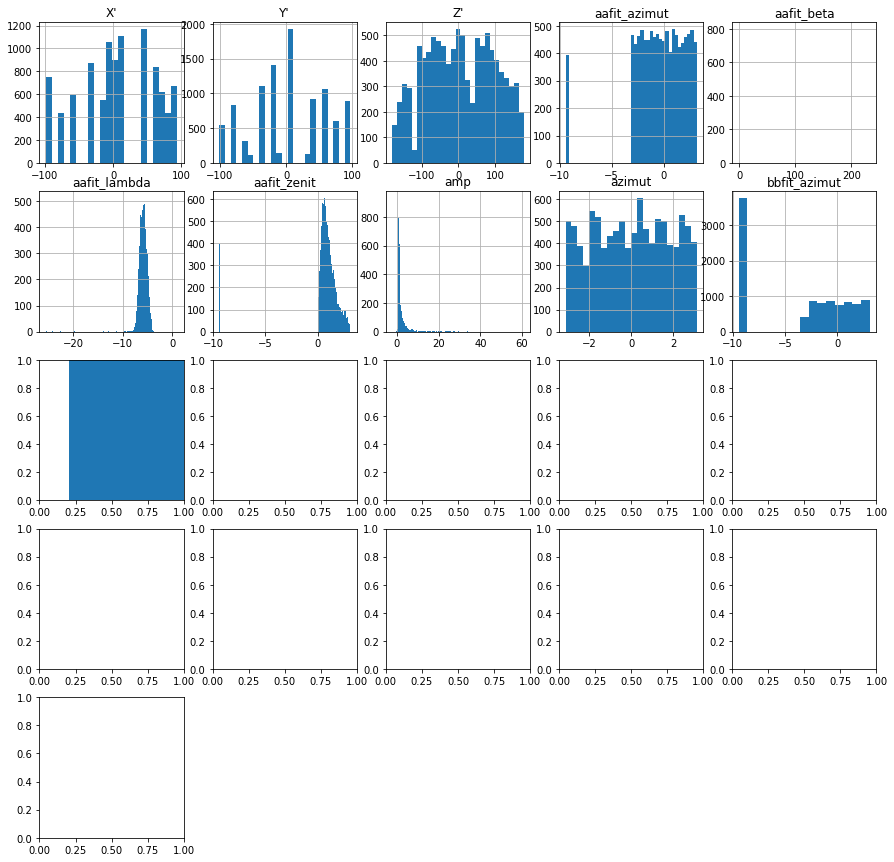

In [9]:
#Esta celda puede tardar "bastante", dependiendo del numero de rows en el dataframe
fig = plt.figure(figsize= (15,15))
ax = fig.gca()
dataset.hist(ax=ax,bins='auto')
plt.tight_layout()
plt.show()

## Graficando las relaciones entre variables

In [ ]:
g = sns.pairplot(dataset[['lin_det','piso_det','mód_opt','X\'','Y\'','Z\'','azimut','zenit','amp','frec_hits']])#, diag_kind="kde")
g.fig.suptitle("Relaciones entre variables de los Hits", y = 1.01, fontsize=30)
plt.show()

In [ ]:
g = sns.pairplot(raw_dataset[['aafit_azimut','aafit_zenit','aafit_lambda','aafit_beta']], diag_kind="kde")
g.fig.suptitle("Gráficos de relaciones de aafit", y = 1.01, fontsize=30)
plt.show()

In [ ]:
#bbfit
g = sns.pairplot(raw_dataset[['bbfit_azimut','bbfit_zenit','bbfit_quality']], diag_kind="kde")
g.fig.suptitle("Gráficos de relaciones de bbfit", y = 1.01, fontsize=30)
plt.show()

## División del dataset en train y test

Una vez que "vimos" como son los datos y sus distribuciones, necesito dividir la data en validación y test para comenzar con los algoritmos de machine learning y deep learning.

Referencias

* https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [12]:
#Separamos la data en X e Y, en este caso son 2 Ys.
X = dataset.iloc[:,:19]
y_muon_az = dataset.iloc[:,19]
y_muon_ze = dataset.iloc[:,20]

X_values = X.values
y_muon_az_val = y_muon_az.values
y_muon_ze_val = y_muon_ze.values

In [13]:
#Dividimos el dataset en train y test para la primer validación (validación hold-out)   ##### AZIMUT
#Como vamos a hacer validación anidada, deberemos volver a dividir posteriormente.
X_train_0_maz, X_test_0_maz, y_train_0_maz, y_test_0_maz = train_test_split(X_values, y_muon_az_val, test_size=0.3, random_state=rs)
#Como quedo dividido en train y test para la variable muon_azimut
print(X_train_0_maz.shape,X_test_0_maz.shape,y_train_0_maz.shape,y_test_0_maz.shape)

(7000, 19) (3000, 19) (7000,) (3000,)


In [14]:
#Validación hold-out ##### ZENIT
X_train_0_mze, X_test_0_mze, y_train_0_mze, y_test_0_mze = train_test_split(X_values, y_muon_ze_val, test_size=0.3, random_state=rs)
#Como quedo dividido en train y test para la variable muon_azimut
print(X_train_0_mze.shape,X_test_0_mze.shape,y_train_0_mze.shape,y_test_0_mze.shape)

(7000, 19) (3000, 19) (7000,) (3000,)


# MODELADO UTILIZANDO REGRESIÓN LINEAL MÚLTIPLE (PRUEBA INICIAL)

Referencias
* https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/
* https://www.dataquest.io/blog/understanding-regression-error-metrics/
* https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/
* https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [15]:
## Metricas para regresión
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error

#Función para calcular las métricas requeridas para regresión
def metricas(y_true, y_predict):
    errors = abs(y_true - y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    mse = mean_squared_error(y_true, y_predict)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true-y_predict)/y_true)) * 100
    maxe = max_error(y_true, y_predict)
    #mpe =
    return(round(mae,4),round(mse,4),round(rmse,4),round(mape,4),round(maxe,4))

### Test de Regresión Lineal Múltiple para la Variable MUON_AZIMUT

In [16]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit (X_train_0_maz,y_train_0_maz)

#Generamos el vector de predicciones usando los valores de test
predictions = model.predict(X_test_0_maz)
#Calculando las métricas de error
mae,mse,rmse,mape,maxe = metricas(y_test_0_maz,predictions)

print("RESULTADOS PARA LA VARIABLE DE SALIDA MUON_AZIMUT\n")

print("MAE: ",mae,"\nMSE: ",mse,"\nRMSE:",rmse,"\nMAPE:",mape,"%","\nMAXE:",maxe)

#Observando algunas diferencias de valores reales vs predicciones
print("\nComparando algunas predicciones del inicio\n")
print("Predicciones:   ",predictions[:6])
print("Valores Reales: ",y_test_0_maz[:6])

print("\nComparando algunas predicciones del final\n")
print("Predicciones:   ",predictions[:-7:-1])
print("Valores Reales: ",y_test_0_maz[:-7:-1])

RESULTADOS PARA LA VARIABLE DE SALIDA MUON_AZIMUT

MAE:  1.2866 
MSE:  151.1307 
RMSE: 12.2935 
MAPE: 292.3094 % 
MAXE: 668.5471

Comparando algunas predicciones del inicio

Predicciones:    [ 0.12977389  1.00436495 -0.52850275  0.43826735 -1.2849447   1.393316  ]
Valores Reales:  [ 0.23624189 -0.30033259 -0.46081619  0.98577492 -1.90603035  1.00884016]

Comparando algunas predicciones del final

Predicciones:    [ 1.91953913  0.62095439  0.71785975 -1.20990847  0.41281204 -1.67834963]
Valores Reales:  [ 0.84722419  0.81207004  0.22150921 -2.09840593  0.16940611  1.4995288 ]


In [17]:
print("Minimos")
print(y_test_0_maz.min(),predictions.min())
print("Máximos")
print(y_test_0_maz.max(),predictions.max())


Minimos
-3.1398212410461586 -669.3810910784792
Máximos
3.1392820243203263 2.4189957427391873


In [18]:
### Algunas otras métricas que podrían servir, pero no usaré por el momento

#print(median_absolute_error(y_test_0_maz,predictions))
#print(model.score(X_test_0_maz,y_test_0_maz))
#print(explained_variance_score(y_test_0_maz,predictions))

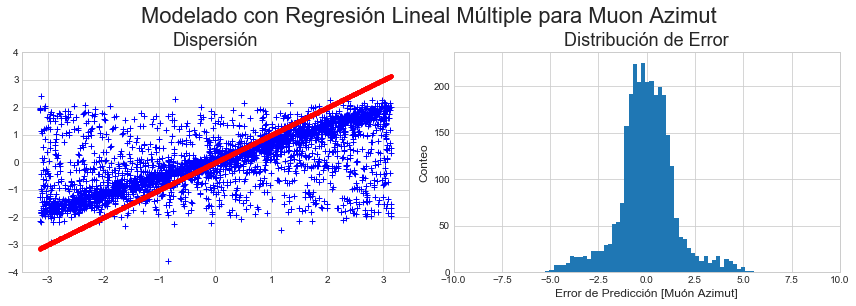

In [20]:
#### Grafica de Dispersión y distribución del error para la variable MUON_AZIMUT ####
plt.style.use('seaborn-whitegrid')

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
fig.suptitle("Modelado con Regresión Lineal Múltiple para Muon Azimut", size=22, y=1.05)

#Graficando valores reales vs valores predichos así como la recta de valores reales
ax1.plot(y_test_0_maz, predictions, '+', color='blue')
ax1.plot(y_test_0_maz,y_test_0_maz, '.', color='red') # Esta es la línea recta
#ax1.set_xlim([-3, 3])
ax1.set_ylim([-4, 4])
ax1.set_title("Dispersión",size=18)
## Los valores deberían estar cerca a la línea roja sin estar todos sobre de ella ya que estarían en overfit, así como
## si la mayoría están "lejanos", el modelo está en subfit.

#Caluclando los errores
error = predictions - y_test_0_maz
#Graficando la distribución de error
ax2.set_xlim([-10, 10])

ax2.hist(error,bins='auto')
ax2.set_title("Distribución de Error",size=18)
ax2.set_xlabel("Error de Predicción [Muón Azimut]", size=12)
ax2.set_ylabel("Conteo", size=12)

plt.tight_layout()
plt.show()

### ANÁLISIS INICIAL DE LOS RESULTADOS DE REGRESIÓN LINEAL MÚLTIPLE PARA LA VARIABLE MUON_AZIMUT

<font size=3>Como se puede apreciar de las métricas anteriores, y del gráfico de dispersión, <B>el modelo generado con regresión lineal múltiple no es bueno en absoluto,</B> ya que tomando en cuenta que la variable muon_azimut toma valores entre -3.079585 y 3.091667, entonces al tener que la raíz del error cuadrático medio es de: 1.4, esto quiere decir que los valores predichos, se alejan "bastante" de lo real, llegando a tener un error máximo mayor a 5.</font>

### Test de Regresión Lineal Múltiple para la Variable MUON_ZENIT

In [21]:
model = linear_model.LinearRegression()
model.fit (X_train_0_mze,y_train_0_mze)

#Generamos el vector de predicciones usando los valores de test
predictions = model.predict(X_test_0_mze)
#Calculando las métricas de error
mae,mse,rmse,mape,maxe=metricas(y_test_0_mze,predictions)

print("MAE: ",mae,"\nMSE: ",mse,"\nRMSE:",rmse,"\nMAPE:",mape,"%","\nMAXE:",maxe)

#Observando algunas diferencias de valores reales vs predicciones
print("\nComparando algunas predicciones del inicio\n")
print("Predicciones:   ",predictions[:6])
print("Valores Reales: ",y_test_0_maz[:6])

print("\nComparando algunas predicciones del final\n")
print("Predicciones:   ",predictions[:-7:-1])
print("Valores Reales: ",y_test_0_maz[:-7:-1])

MAE:  0.3744 
MSE:  74.6858 
RMSE: 8.6421 
MAPE: 39.1277 % 
MAXE: 472.9663

Comparando algunas predicciones del inicio

Predicciones:    [0.50512889 1.26960463 1.76970271 1.700299   1.60077601 1.44169101]
Valores Reales:  [ 0.23624189 -0.30033259 -0.46081619  0.98577492 -1.90603035  1.00884016]

Comparando algunas predicciones del final

Predicciones:    [1.8619902  1.00210973 1.5024163  0.73571342 0.6350567  1.2095839 ]
Valores Reales:  [ 0.84722419  0.81207004  0.22150921 -2.09840593  0.16940611  1.4995288 ]


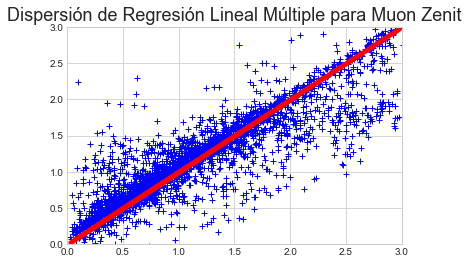

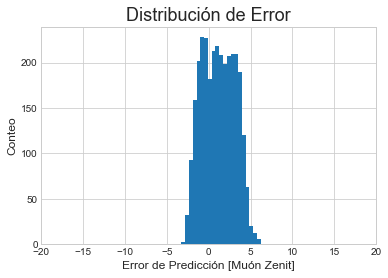

In [22]:
#Graficando valores reales vs valores predichos así como la recta de valores reales
plt.style.use('seaborn-whitegrid')
plt.title("Dispersión de Regresión Lineal Múltiple para Muon Zenit",size=18)
plt.plot(y_test_0_mze, predictions, '+', color='blue')
plt.plot(y_test_0_mze,y_test_0_mze, '.', color='red') #Línea recta
plt.ylim(0,3)
plt.xlim(0,3)
plt.show()
#Los valores deberían estar cerca a la línea roja sin estar todos sobre de ella ya que estarían en overfit.


#Distribución de los errores
error = predictions - y_test_0_maz
plt.style.use('seaborn-whitegrid')
plt.title("Distribución de Error",size=18)

plt.hist(error, bins = 'auto')
plt.xlabel("Error de Predicción [Muón Zenit]", size =12)
_ = plt.ylabel("Conteo", size=12)
plt.xlim(-20,20)
plt.show()

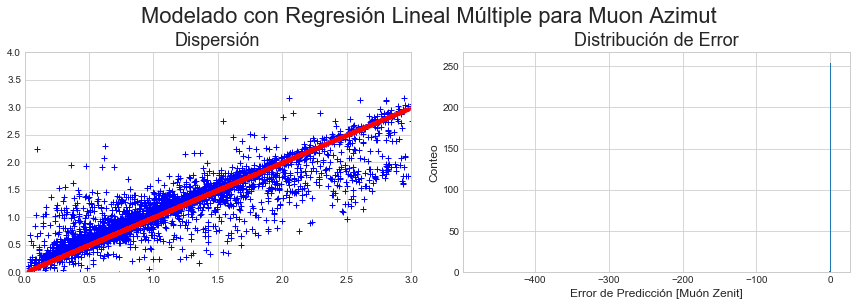

In [23]:
#### Grafica de Dispersión y distribución del error para la variable MUON_ZENIT ####

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
fig.suptitle("Modelado con Regresión Lineal Múltiple para Muon Azimut", size=22, y=1.05)

#Graficando valores reales vs valores predichos así como la recta de valores reales
ax1.plot(y_test_0_mze, predictions, '+', color='blue')
ax1.plot(y_test_0_mze,y_test_0_mze, '.', color='red') # Esta es la línea recta
ax1.set_xlim([0, 3])
ax1.set_ylim([0, 4])
ax1.set_title("Dispersión",size=18)
## Los valores deberían estar cerca a la línea roja sin estar todos sobre de ella ya que estarían en overfit, así como
## si la mayoría están "lejanos", el modelo está en subfit.

#Caluclando los errores
error = predictions - y_test_0_mze
#Graficando la distribución de error
#ax2.set_xlim([-10, 10])

ax2.hist(error,bins='auto')
ax2.set_title("Distribución de Error",size=18)
ax2.set_xlabel("Error de Predicción [Muón Zenit]", size=12)
ax2.set_ylabel("Conteo", size=12)

plt.tight_layout()
plt.show()

# MODELADO UTILIZANDO RANDOM FOREST

In [24]:
#Intentare un Random Forest con x árboles
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 10, max_depth=4,random_state=42)
rf.fit (X_train_0_maz, y_train_0_maz)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [25]:
#Generamos el vector de predicciones usando los valores de test
predictions = rf.predict(X_test_0_maz)
#Calculando las métricas de error
mae,mse,rmse,mape,maxe=metricas(y_test_0_maz,predictions)

print("MAE: ",mae,"\nMSE: ",mse,"\nRMSE:",rmse,"\nMAPE:",mape,"%","\nMAXE:",maxe)

#Observando algunas diferencias de valores reales vs predicciones
print("\nComparando algunas predicciones del inicio\n")
print("Predicciones:   ",predictions[:6])
print("Valores Reales: ",y_test_0_maz[:6])

print("\nComparando algunas predicciones del final\n")
print("Predicciones:   ",predictions[:-7:-1])
print("Valores Reales: ",y_test_0_maz[:-7:-1])

MAE:  0.8837 
MSE:  1.7641 
RMSE: 1.3282 
MAPE: 182.5092 % 
MAXE: 5.5359

Comparando algunas predicciones del inicio

Predicciones:    [ 0.35729969  0.32975027 -1.69161816  1.00725575 -1.98825361  0.67712218]
Valores Reales:  [ 0.23624189 -0.30033259 -0.46081619  0.98577492 -1.90603035  1.00884016]

Comparando algunas predicciones del final

Predicciones:    [-0.07721566  0.73629769  0.41153793 -0.98327509  0.36596996 -0.77195549]
Valores Reales:  [ 0.84722419  0.81207004  0.22150921 -2.09840593  0.16940611  1.4995288 ]


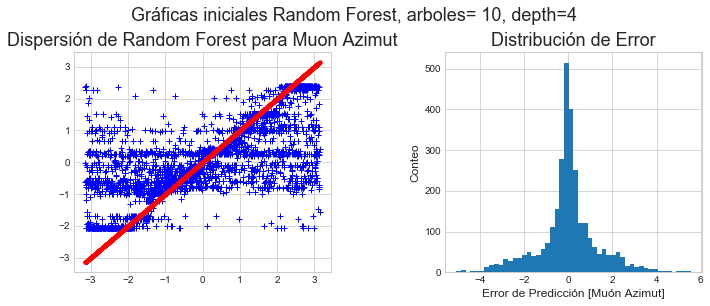

In [26]:
### GRAFICANDO

#Los valores deberían estar cerca a la línea roja sin estar todos sobre de ella ya que estarían en overfit.

error = predictions - y_test_0_maz
plt.style.use('seaborn-whitegrid')

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))#, facecolor='blue')
fig.suptitle("Gráficas iniciales Random Forest, arboles= 10, depth=4", size=18, y=1.05)

#Graficando valores reales vs valores predichos así como la recta de valores reales
ax1.set_title("Dispersión de Random Forest para Muon Azimut",size=18)
ax1.plot(y_test_0_maz, predictions, '+', color='blue')
ax1.plot(y_test_0_maz,y_test_0_maz, '.', color='red') #Línea recta

#Distribución de los errores
ax2.set_title("Distribución de Error",size=18)
ax2.hist(error, bins = 50)
ax2.set_xlabel("Error de Predicción [Muón Azimut]", size =12)
ax2.set_ylabel("Conteo", size=12)

plt.tight_layout()
plt.show()

### Graficando la dispersión de los datos y la distribución del error para x numero de árboles

Referencias:
* https://matplotlib.org/users/tight_layout_guide.html
* https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html
* https://matplotlib.org/3.1.0/gallery/color/named_colors.html

In [27]:
#Función para generar el random forest
def gen_rf(var,ests,dep,rs):
    rf = RandomForestRegressor(n_estimators= ests, max_depth=dep,random_state=rs)
    if var=="az":
        rf.fit (X_train_0_maz, y_train_0_maz)
        preds = rf.predict(X_test_0_maz)
    if var=="ze":
        rf.fit (X_train_0_mze, y_train_0_mze)
        preds = rf.predict(X_test_0_mze)
    return(preds,rf)

#Función para graficar la dispersión de la data y la distribución del error de predicciones
def graf_rf(var,ests,dep):
    if var == "az":
        titulo = "RANDOM FOREST AZIMUT, arboles= "+str(ests)+" depth= "+str(dep)
        predictions,model = gen_rf("az",ests,dep,42)
    if var == "ze":
        titulo = "RANDOM FOREST ZENIT, depth= "+str(dep)
        predictions,model = gen_rf("ze",ests,dep,42)
    #Calculando e Imprimiendo las métricas de errores
    #Necesito meter las metricas a un dataframe para comparar resultados de los árboles
    templist = []
    mae,mse,rmse,mape,maxe=metricas(y_test_0_maz,predictions)
    templist = [ests,dep,mae,mse,rmse,mape,maxe]
    mets.append(templist)
    #Impresión de los gráficos
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4), facecolor='papayawhip')
    fig.suptitle(titulo, size=18, y=1.05)
    ax1.set_title("Dispersión",size=15)
    ax1.plot(y_test_0_maz, predictions, '.', color='blue')
    ax1.plot(y_test_0_maz,y_test_0_maz, '.', color='red')
    ax1.set_xlabel("Valores de la variable", size =14)
    ax1.set_ylabel("Valores de la variable", size=14)
    error = predictions - y_test_0_maz
    ax2.set_title("Distribución del Error",size=15)
    ax2.hist(error, bins = 50)
    ax2.set_xlabel("Error de Predicción", size =12)
    ax2.set_ylabel("Conteo", size=14)
    plt.tight_layout()
    plt.show()

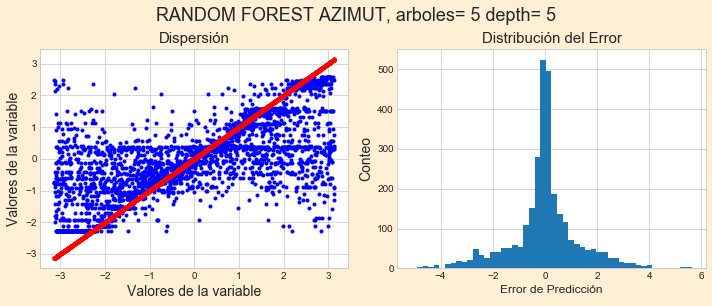

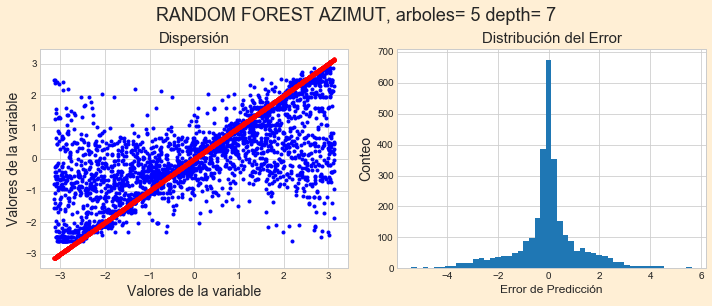

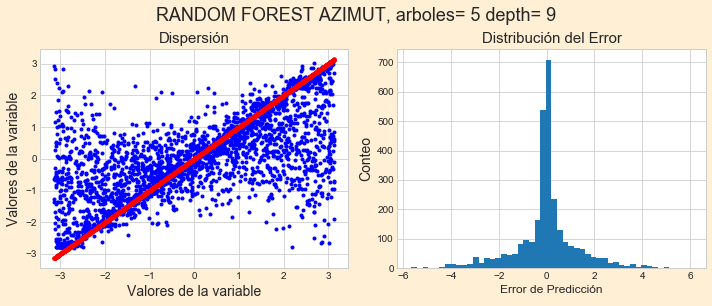

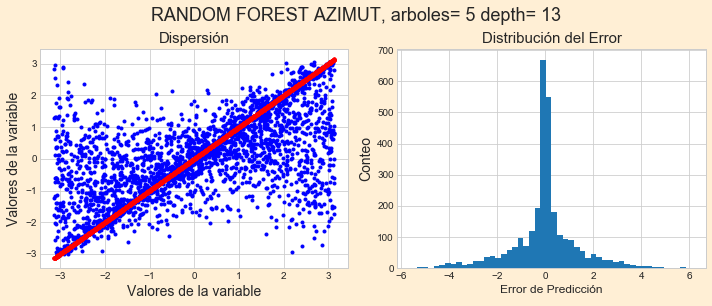

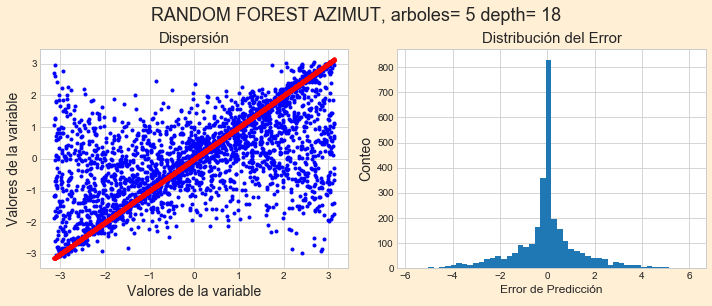

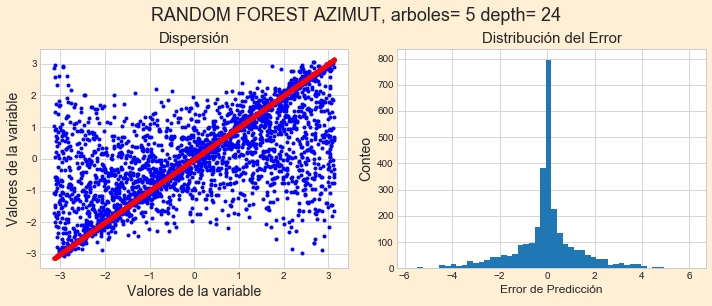

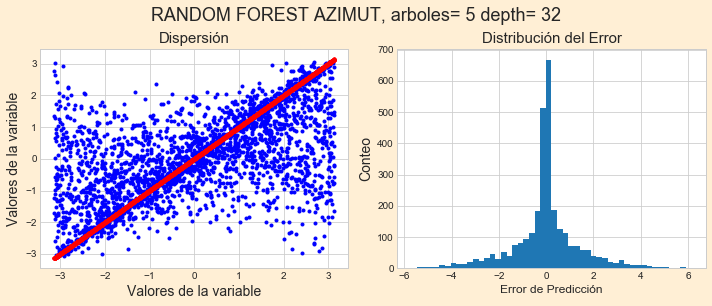

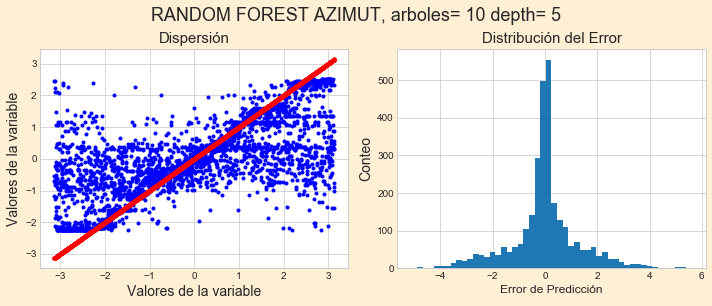

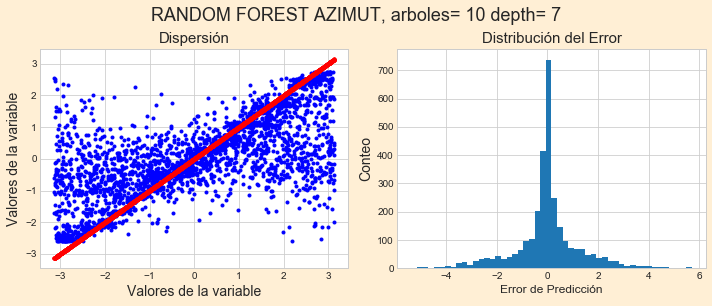

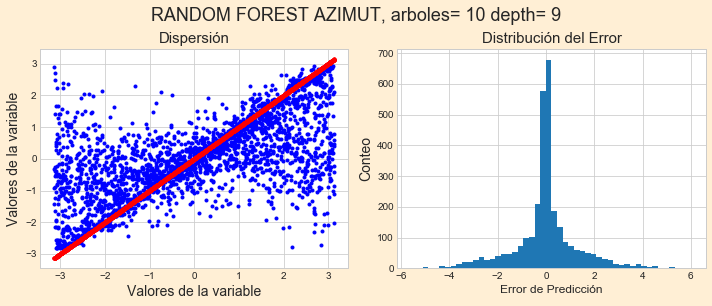

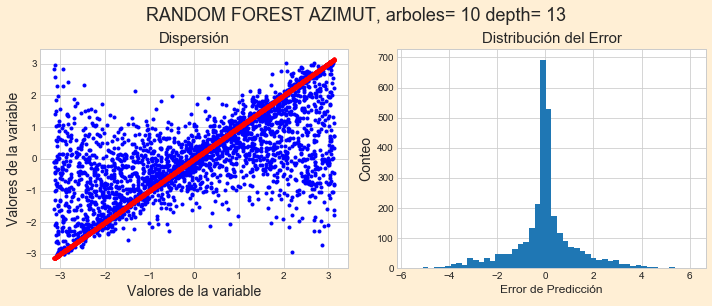

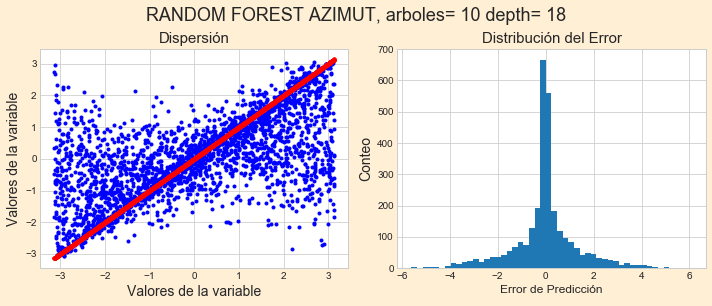

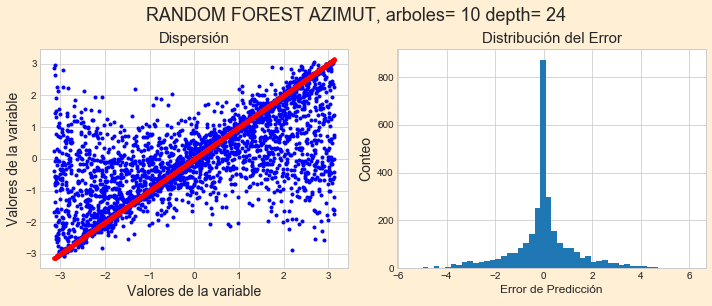

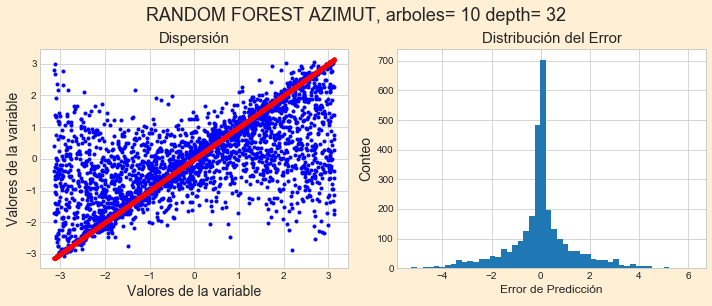

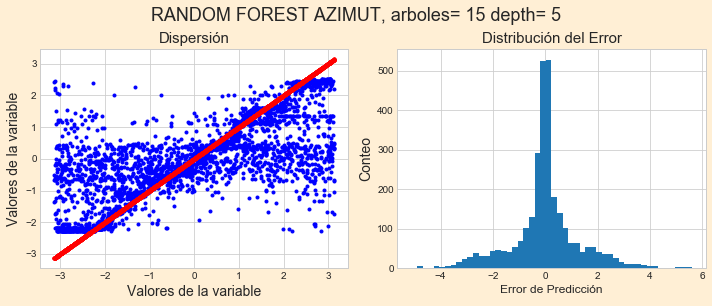

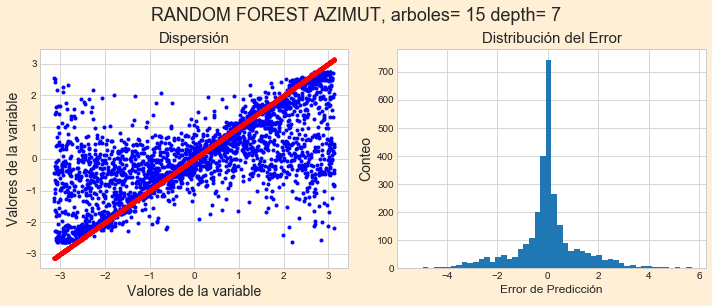

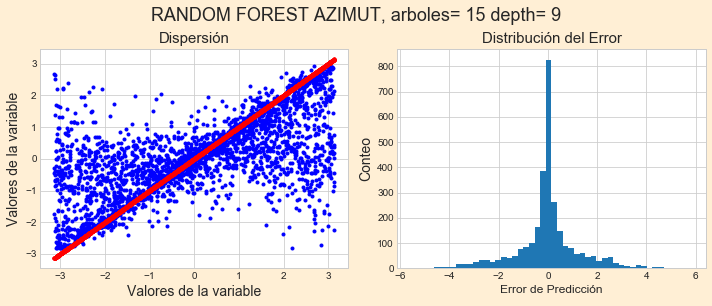

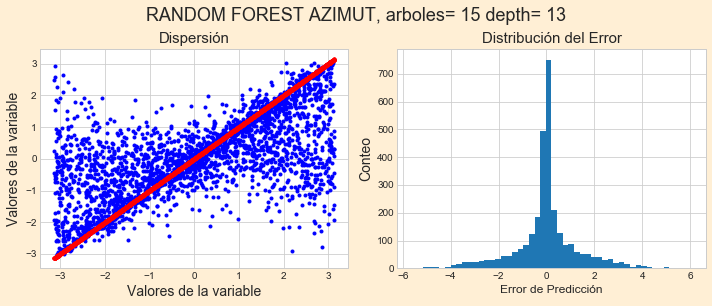

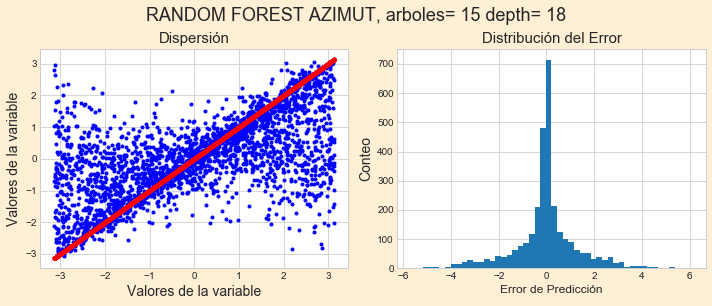

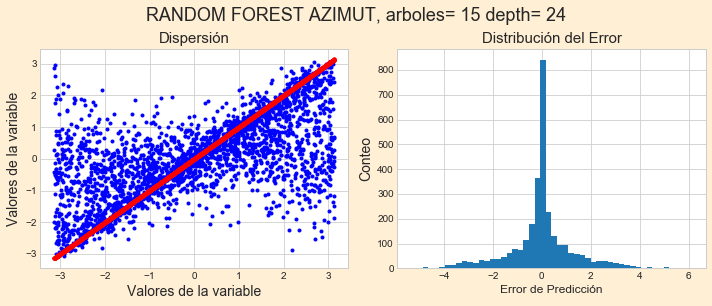

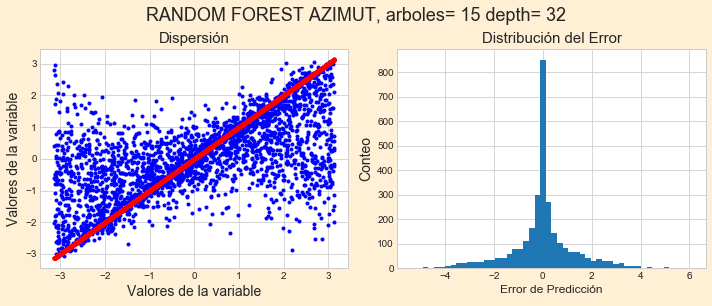

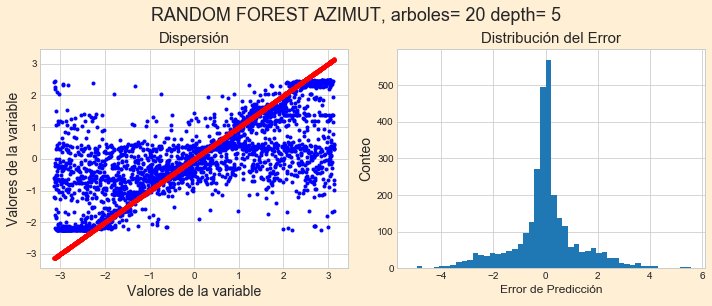

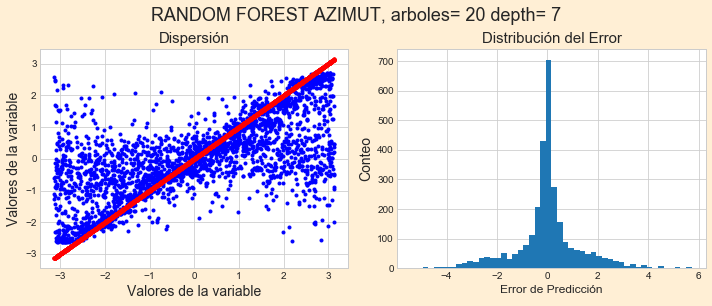

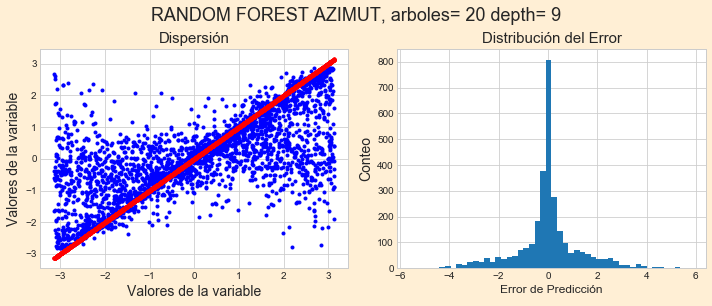

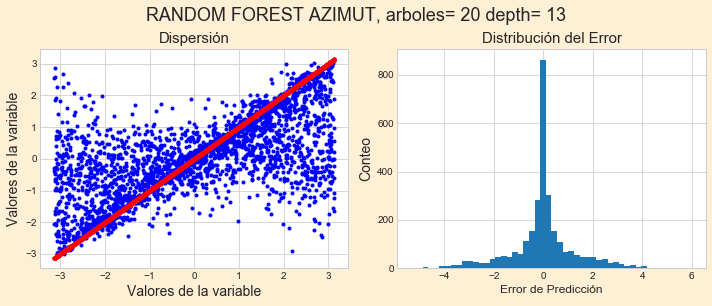

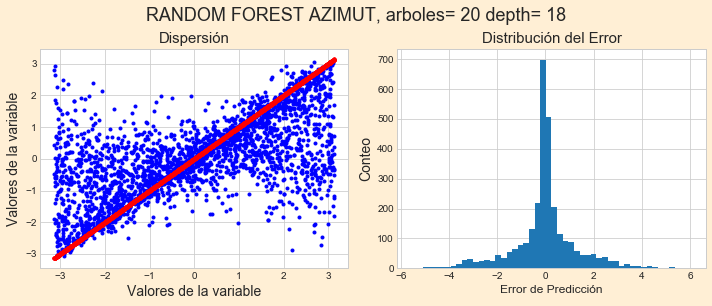

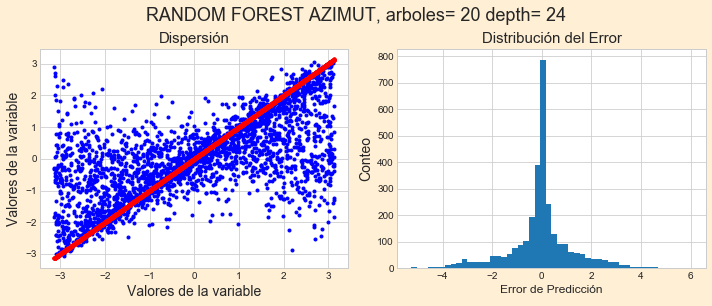

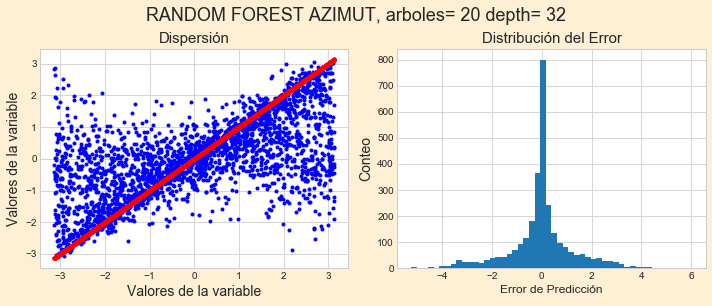

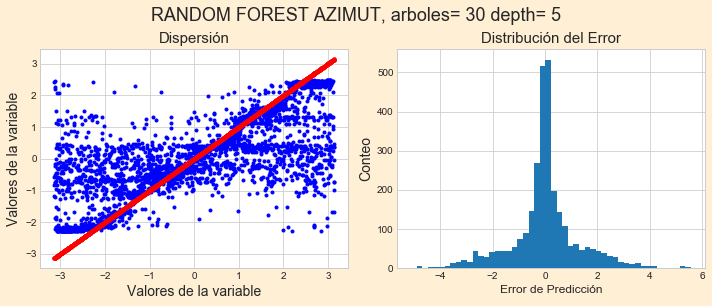

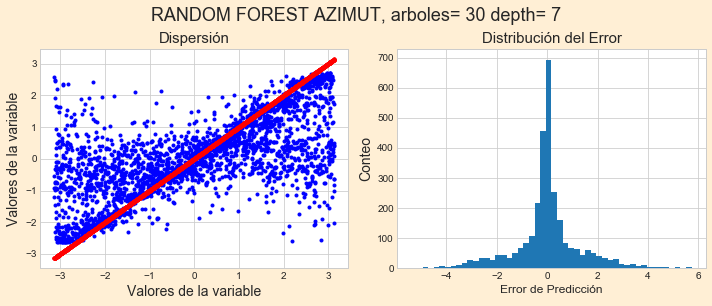

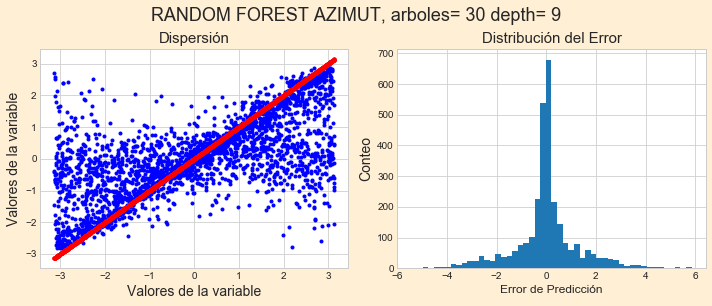

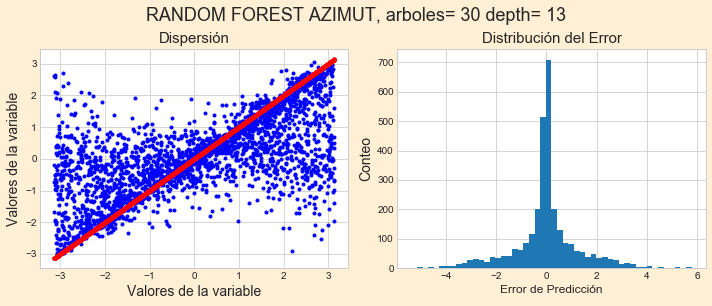

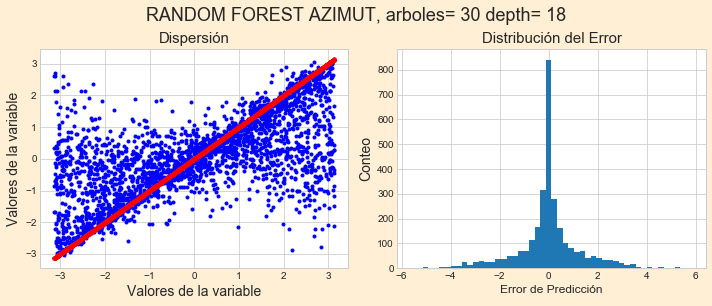

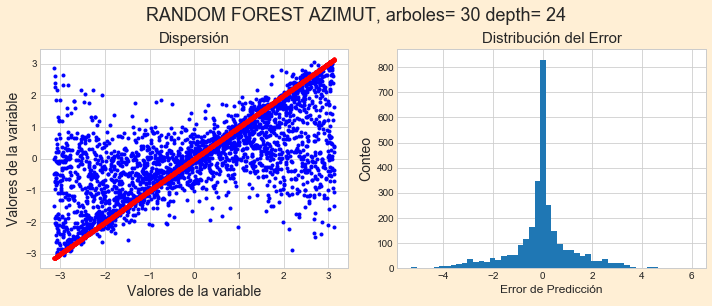

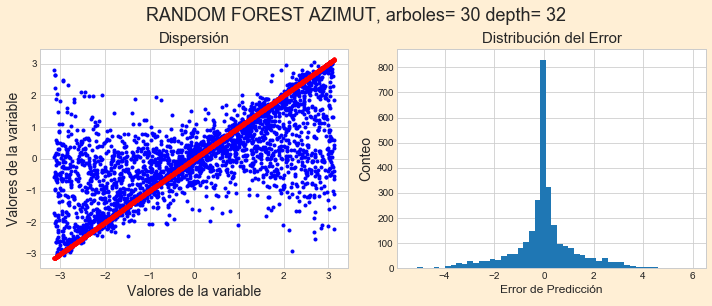

In [36]:
#Visualizando para diferentes "depths", es decir número de árboles
arboles = [5,10,15,20,30]
depths = [5,7,9,13,18,24,32]
mets = []

for i in arboles:
    for j in depths:
        graf_rf("az",i,j)

In [37]:
#Observando los errores para las diferentes pruebas del Random Forest Regressor
columnas = ['#Arboles','Depth','MAE','MSE','RMSE','MAPE','MAXE']

results = pd.DataFrame(mets, columns=columnas)

results

,#Arboles,Depth,MAE,MSE,RMSE,MAPE,MAXE
0,5,5,0.8676,1.7607,1.3269,187.4282,5.6202
1,5,7,0.8456,1.7599,1.3266,217.1717,5.6256
2,5,9,0.8463,1.8150,1.3472,216.0124,6.0637
3,5,13,0.8783,1.9561,1.3986,270.2949,6.0874
4,5,18,0.9022,2.0440,1.4297,270.7436,6.0900
5,5,24,0.9061,2.0514,1.4323,270.2781,6.0885
6,5,32,0.9064,2.0452,1.4301,268.1404,6.1498
7,10,5,0.8579,1.7286,1.3147,191.6589,5.6095
8,10,7,0.8344,1.7236,1.3129,217.4511,5.6994
9,10,9,0.8276,1.7433,1.3203,215.4716,6.0277


In [38]:
#Comparando para la máxima profundidad (número de ramas del árbol)

results[results['Depth']==18]

,#Arboles,Depth,MAE,MSE,RMSE,MAPE,MAXE
4,5,18,0.9022,2.0440,1.4297,270.7436,6.0900
11,10,18,0.8572,1.8643,1.3654,260.2801,6.0885
18,15,18,0.8468,1.8207,1.3493,257.0188,6.0811
25,20,18,0.8408,1.7931,1.3390,233.4274,6.0623
32,30,18,0.8340,1.7599,1.3266,214.8270,5.8296


In [39]:
#Otra forma de ver los mismos resultados de la celda anterior
from tabulate import tabulate

def pprint_df(dframe):
    print (tabulate(dframe, headers='keys', tablefmt='psql', showindex=False))

pprint_df(results)

# Referencias:
# https://stackoverflow.com/questions/24644656/how-to-print-pandas-dataframe-without-index

+------------+---------+--------+--------+--------+---------+--------+
|   #Arboles |   Depth |    MAE |    MSE |   RMSE |    MAPE |   MAXE |
|------------+---------+--------+--------+--------+---------+--------|
|          5 |       5 | 0.8676 | 1.7607 | 1.3269 | 187.428 | 5.6202 |
|          5 |       7 | 0.8456 | 1.7599 | 1.3266 | 217.172 | 5.6256 |
|          5 |       9 | 0.8463 | 1.815  | 1.3472 | 216.012 | 6.0637 |
|          5 |      13 | 0.8783 | 1.9561 | 1.3986 | 270.295 | 6.0874 |
|          5 |      18 | 0.9022 | 2.044  | 1.4297 | 270.744 | 6.09   |
|          5 |      24 | 0.9061 | 2.0514 | 1.4323 | 270.278 | 6.0885 |
|          5 |      32 | 0.9064 | 2.0452 | 1.4301 | 268.14  | 6.1498 |
|         10 |       5 | 0.8579 | 1.7286 | 1.3147 | 191.659 | 5.6095 |
|         10 |       7 | 0.8344 | 1.7236 | 1.3129 | 217.451 | 5.6994 |
|         10 |       9 | 0.8276 | 1.7433 | 1.3203 | 215.472 | 6.0277 |
|         10 |      13 | 0.8488 | 1.8242 | 1.3506 | 252.816 | 6.0792 |
|     

In [ ]:
#Si queremos guardar el modelo se hace de la siguiente manera
import pickle
archivo_modelo = 'modelo_rf_muon_azimut.sav'
pickle.dump(model, open(path+archivo_modelo, 'wb'))

# Referencia
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [ ]:
# Calculate mean absolute percentage error (MAPE)
#mape = 100 * (errors / y_test_0_mze)
# Calculate and display accuracy
#accuracy = 100 - np.mean(mape)
#print('Accuracy:', round(accuracy, 2), '%.')